In [1]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn.pool import knn_graph
import random

In [38]:
num_nodes = 5
num_node_features = 10
x = torch.randn(num_nodes, num_node_features)
print(x)

tensor([[ 0.2917, -0.4102,  0.0612, -1.6061, -1.4425, -1.2833, -0.5007, -0.9110,
         -0.0906, -0.0296],
        [ 0.3501,  0.4766, -0.0981, -1.5685,  1.2864, -0.4663,  0.9245,  0.6960,
         -0.7973,  0.4715],
        [ 1.1865, -2.1781,  0.6104,  0.9035, -1.6471,  2.3822,  0.1280,  0.1646,
         -1.8804,  1.2913],
        [ 0.4666,  1.9701,  0.6319,  1.1606,  0.4872,  0.6656,  0.8893, -1.3375,
          0.9061, -1.4837],
        [-0.0313, -2.5533, -1.7784, -2.0705, -2.4544, -0.0059, -0.5828, -0.3028,
         -1.2999, -0.7056]])


In [39]:
pos = torch.randn(num_nodes, 2)
print(pos)

tensor([[-0.8282, -2.3725],
        [-0.6336, -0.8544],
        [ 0.1012, -0.2540],
        [-1.0411, -2.1609],
        [-0.7455,  1.5249]])


In [40]:
edge_index = knn_graph(pos, k=4, loop=False)

In [41]:
y = x.sum(dim=1).mean().unsqueeze(0)

data = Data(x=x, edge_index=edge_index, pos=pos, y=y)

In [42]:
print(data.pos)

tensor([[-0.8282, -2.3725],
        [-0.6336, -0.8544],
        [ 0.1012, -0.2540],
        [-1.0411, -2.1609],
        [-0.7455,  1.5249]])


### visualizing geometric data object as a networkx graph

In [43]:
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

In [44]:
G = to_networkx(data,to_undirected=True,node_attrs=['x'],edge_attrs=None)

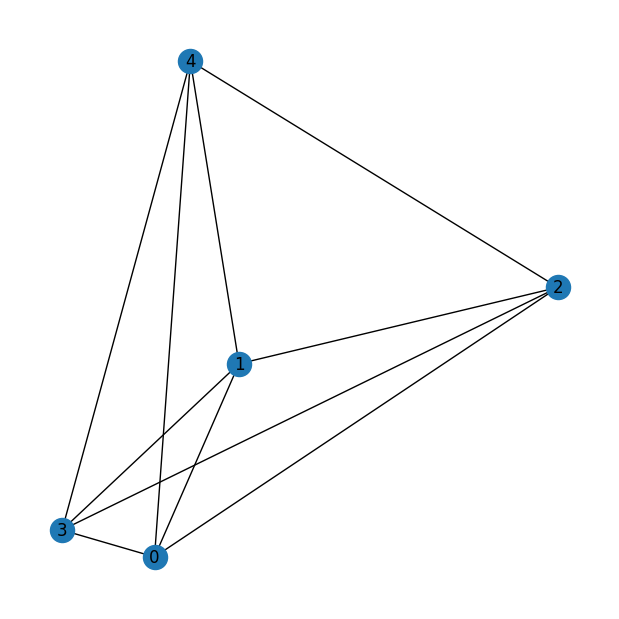

In [45]:
# the position helps to visualize the true graph. If pos is not passed to nx.draw, we lose information on 
# the position of the nodes (see the cell below this)
pos = {i: data.pos[i].tolist() for i in range(data.num_nodes)}

plt.figure(figsize=(6, 6))
nx.draw(G,pos,node_size=300,with_labels=True)
plt.show()

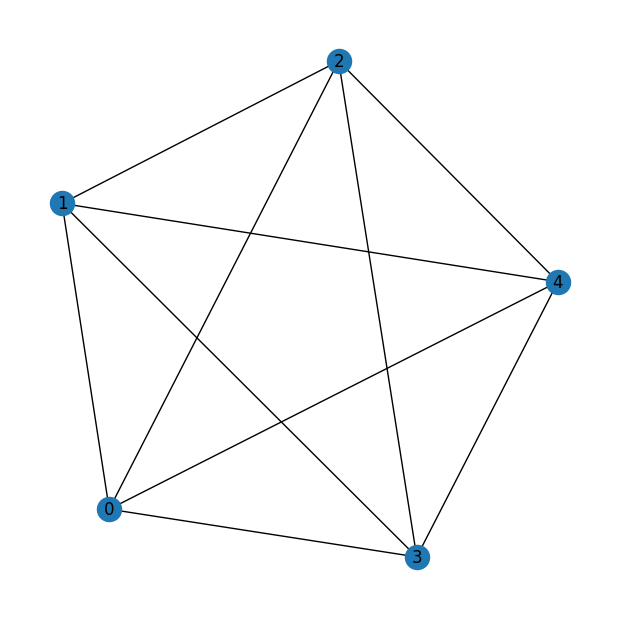

In [46]:
# this will give a neat graph 
plt.figure(figsize=(6, 6))
nx.draw(G,node_size=300,with_labels=True)
plt.show()

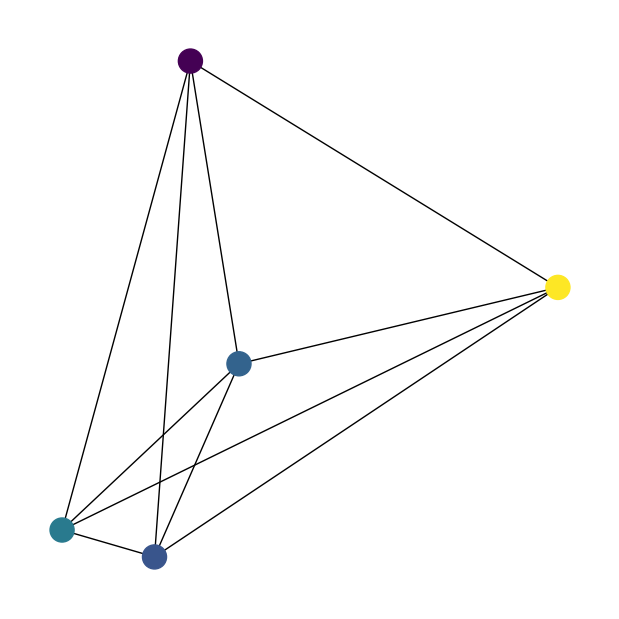

In [47]:
node_colors = data.x[:, 0].numpy()

plt.figure(figsize=(6, 6))
nx.draw(G,pos,node_color=node_colors,node_size=300,with_labels=False)
# plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
plt.show()


In [48]:
def create_random_graph(min_nodes=5, max_nodes=30, num_node_features=10, k=4):
    num_nodes = random.randint(min_nodes, max_nodes)

    x = torch.randn(num_nodes, num_node_features)

    pos = torch.randn(num_nodes, 2)

    edge_index = knn_graph(pos, k=k, loop=False)

    y = x.sum(dim=1).mean().unsqueeze(0)

    return Data(
        x=x,
        edge_index=edge_index,
        pos=pos,
        y=y
    )

In [49]:
def create_dataset(num_graphs=1000):
    dataset = []
    for _ in range(num_graphs):
        graph = create_random_graph()
        dataset.append(graph)
    return dataset

In [50]:
dataset = create_dataset(200)

In [51]:
print()
# print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset[0].x.shape[1]}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Number of graphs: 200
Number of features: 10

Data(x=[16, 10], edge_index=[2, 64], y=[1], pos=[16, 2])
Number of nodes: 16
Number of edges: 64
Average node degree: 4.00
Has isolated nodes: False
Has self-loops: False
Is undirected: False


In [54]:
def plot_geometric_data_as_graph(data):
    G = to_networkx(data, to_undirected=True, node_attrs=['x'], edge_attrs=None)
    pos = {i: data.pos[i].tolist() for i in range(data.num_nodes)}
    fig = plt.figure(figsize=(6, 6))
    nx.draw(G,pos,node_size=300,with_labels=False)
    plt.show()
    fig.clear()

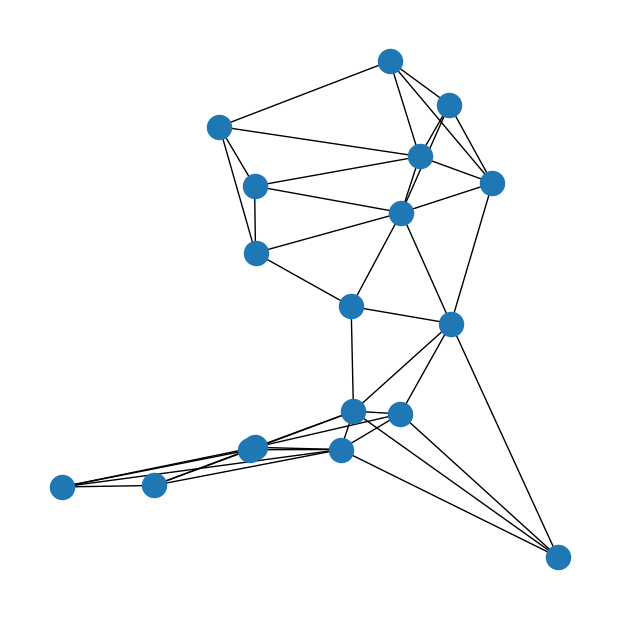

In [55]:
plot_geometric_data_as_graph(dataset[10])